# Data analysis influce of the Covid-19 pandemic
<span style="color:red">TBD: short description about the whole project</span>.
</br></br>
<span style="color:red">TBD: Update all tables before submittion</span>.
</br></br>
<span style="color:red">TBD: add plots which show the sizes of the different table</span>.

In [18]:
# Initial imports for data handling and visualization
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced data visualization
import numpy as np  # For numerical operations

# Additional imports for plotting and date handling
import matplotlib.pyplot as plt  # For creating static plots
import matplotlib.dates as mdates  # For handling date formats in plots
from sklearn.preprocessing import MinMaxScaler
import warnings

### Load Covid Data From CSV File
The dataset is provided by the World Health Organisation: https://ourworldindata.org/covid-cases (last accessed: 13.12.2023)

<span style="color:red">TBD: What are the data about? Explain short which facts are how often (daily) displayed in the table</span>

In [19]:
#Read in the dataset and plot 5 random rows
covid_data_df = pd.read_csv('Data/owid-covid-data.csv')
covid_data_df.sample(n=5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121115,GIB,Europe,Gibraltar,2021-11-19,6780.00,59.00,64.57,98.00,0.00,0.00,...,NaN,NaN,NaN,79.93,NaN,32677.00,NaN,NaN,NaN,NaN
239946,NOR,Europe,Norway,2021-08-08,141098.00,322.00,416.00,823.00,0.00,1.43,...,20.70,NaN,3.60,82.40,0.96,5434324.00,-1177.50,-1.79,10.82,-217.93
221407,NPL,Asia,Nepal,2023-08-15,1003397.00,1.00,1.14,12031.00,0.00,0.00,...,37.80,47.78,0.30,70.78,0.60,30547586.00,NaN,NaN,NaN,NaN
297270,SLB,Oceania,Solomon Islands,2021-11-09,20.00,0.00,0.00,NaN,0.00,0.00,...,NaN,35.89,1.40,73.00,0.57,724272.00,NaN,NaN,NaN,NaN
155364,ITA,Europe,Italy,2021-09-18,4627699.00,4544.00,4448.71,130233.00,66.00,57.86,...,27.80,NaN,3.18,83.51,0.89,59037472.00,NaN,NaN,NaN,NaN


In [20]:
#Returns the shape of the dataframe, for more detail information use the command: 'covid_data_df.info()'
covid_data_df.shape

(362259, 67)

In [21]:
# Convert to date time object, use 'covid_data_df.dtypes' to see the datatypes
covid_data_df['date'] = pd.to_datetime(covid_data_df['date'])

# Data visualization and pre-processing
<span style="color:red">Which data are be visualized and what kind of pre-processing is done?</span>

<span style="color:red; font-weight: 600">Important: Add (Code) descriptive statistics about total cases. Like standard deviation, ...</span>

1. **Count**: The amount of the total datapoints.

2. **Mean**: The average of all values inside of the dataset for the specific index.

3. **Std (Standard Deviation)**: Reflects the variability of the data; higher values mean greater scatter.

4. **Min (Minimum)**: The smallest value in the data.

5. **25% (25th Percentile)**: One quarter of the data is below this value.

6. **50% (Median or 50th Percentile)**: Half the data is less than this value, and the other half is more.

7. **75% (75th Percentile)**: Three quarters of the data is below this value.

8. **Max (Maximum)**: The biggest value. It's the highest number in your data.



In [22]:

#print(covid_data_df.columns)
covid_data_df_statistic = covid_data_df[['new_cases', 'new_deaths', 'new_tests', 'new_vaccinations']]
np.round(covid_data_df_statistic.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
new_cases,352486.00,9283.34,108394.57,0.00,0.00,1.00,235.00,8401963.00
new_deaths,352534.00,82.68,625.79,0.00,0.00,0.00,2.00,57167.00
new_tests,75403.00,67285.41,247734.00,1.00,2244.00,8783.00,37229.00,35855632.00
new_vaccinations,66337.00,789431.77,3285921.74,0.00,2542.00,24098.00,202530.00,49673197.00


## Total COVID-19 Cases per Continent in Millions
<span style="color:red">Describe what will be plotted in the following: Especially the kind of diagramms (Bar Chart and line chart). Why are these diagramms used?</span>

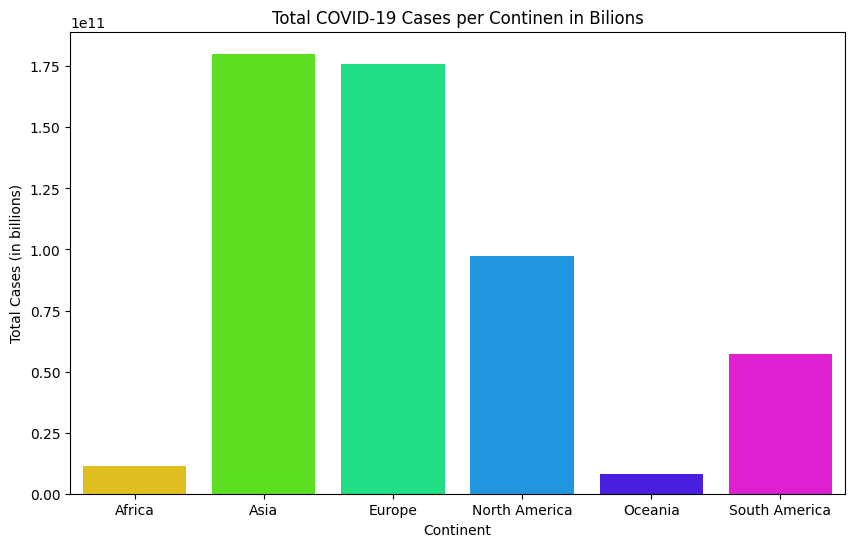

In [23]:
# Summing up the total cases for each continent
total_cases_per_continent = covid_data_df.groupby('continent')['total_cases'].sum().reset_index()

# Setting up the color palette for different continents
palette = sns.color_palette("hsv", len(total_cases_per_continent['continent'].unique()))

# Creating a bar plot with a different color for each continent
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='continent', y='total_cases', data=total_cases_per_continent, palette=palette)

# Adding labels and title for clarity
plt.xlabel('Continent')
plt.ylabel('Total Cases (in billions)')
plt.title('Total COVID-19 Cases per Continen in Bilions')

# Displaying the plot
plt.show()

## Total COVID-19 Cases per Continent Over Time in millions
<span style="color:red">Describe what will be plotted in the following: Especially the kind of diagramms (Bar Chart and line chart). Why are these diagramms used?</span>

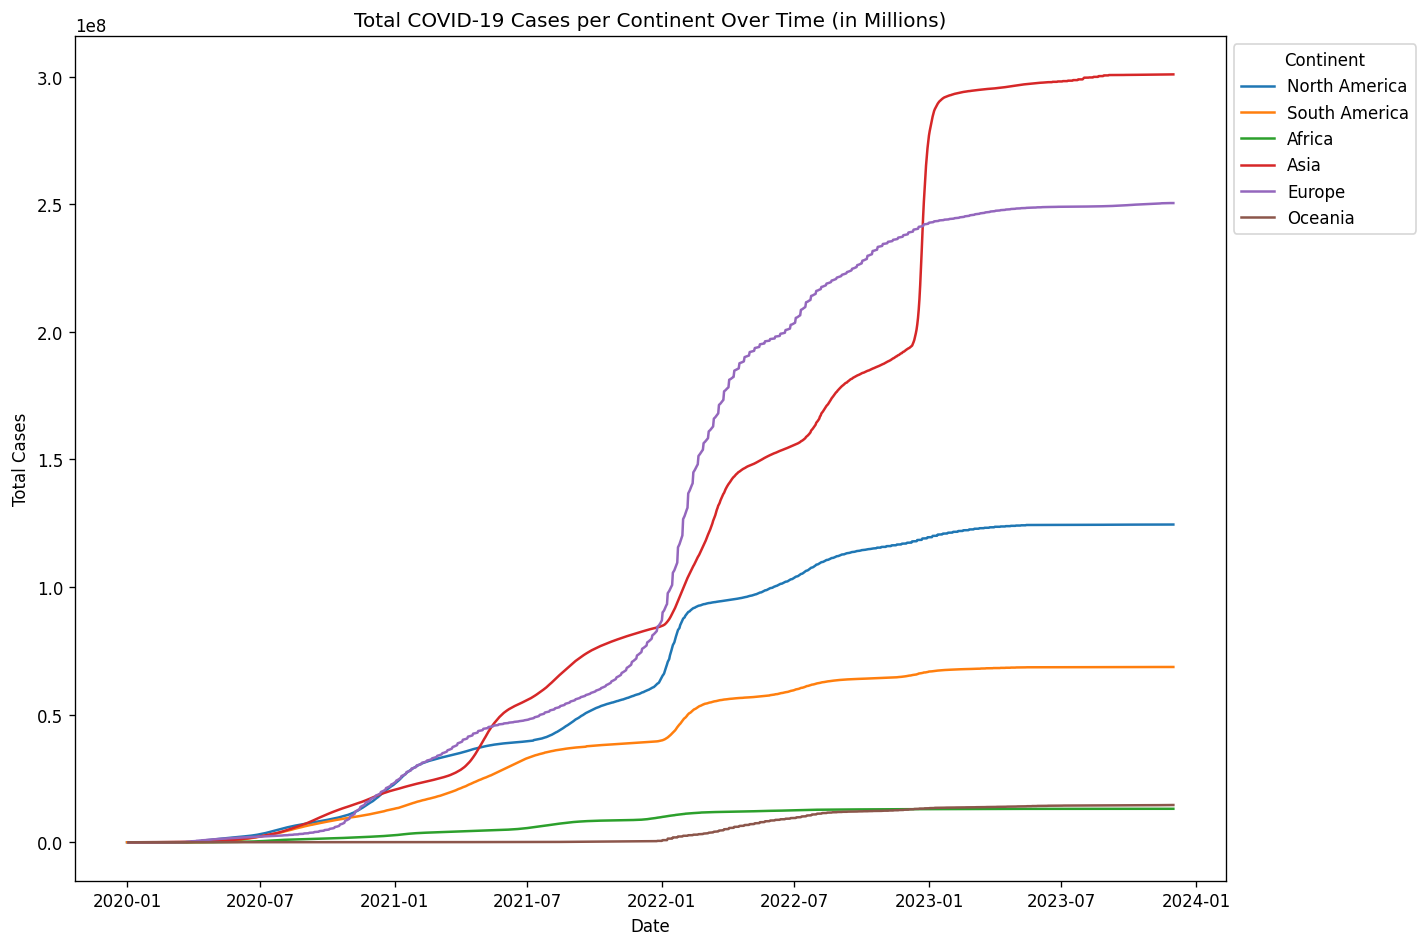

In [24]:
#cutting of the data that causing the drop in the graph, probably due to incomplete dataset
cutoff_date = pd.to_datetime('2023-12-01') 
# r data to exclude dates that may have incomplete data
covid_data_df_filtered = covid_data_df[covid_data_df['date'] <= cutoff_date]

# Sum total cases for each continent on each date
total_cases_per_continent_date = covid_data_df_filtered.groupby(['date', 'continent'])['total_cases'].sum().reset_index()

# Create a high-resolution line plot
plt.figure(figsize=(12, 8), dpi=120)  # Higher DPI for better resolution
sns.lineplot(x='date', y='total_cases', hue='continent', data=total_cases_per_continent_date, palette='tab10')

# Improve date format on x-axis for readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Adjust interval as needed

# Adding labels, title, and grid
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases per Continent Over Time (in Millions)')

# Improve legend
plt.legend(title='Continent', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of the plot

# Display the plot
plt.tight_layout()  # Adjust layout
plt.show()

## Correlation between the Number of Flights and Covid in the UK
The dataset is available: https://www.ons.gov.uk/economy/economicoutputandproductivity/output/datasets/dailyukflights (last accessed: 29.12.2023)

<span style="color:red">Describe why we plot the flight data and what is plotted. Which assumptions can be made out of the result of the plot?</span>

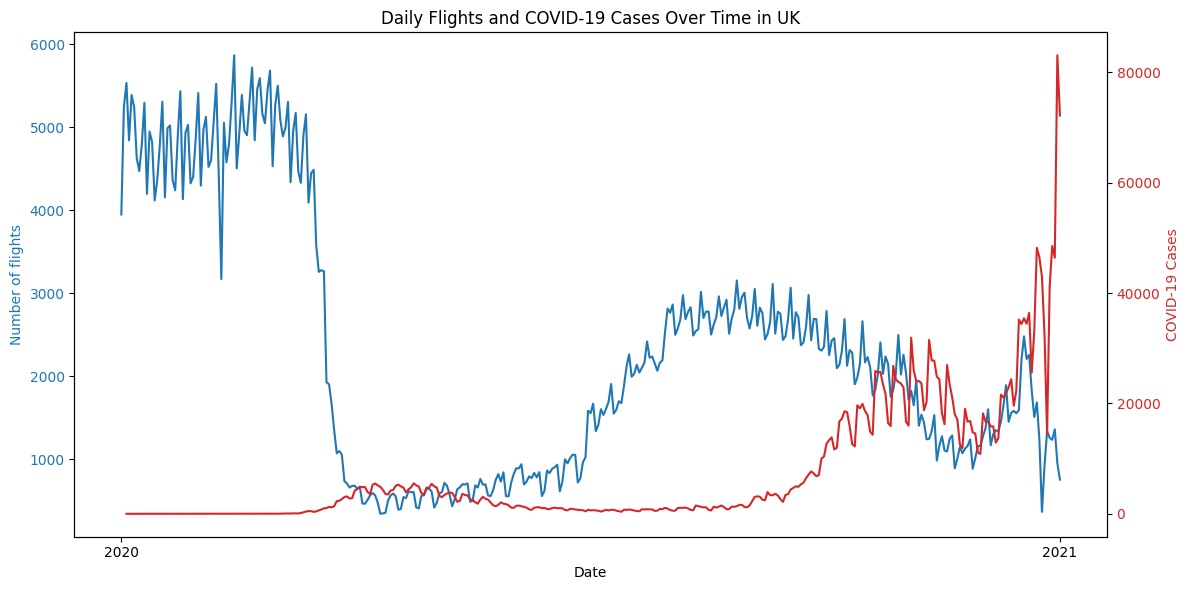

In [25]:
# Define start and end period
startPeriod = '2020-01-01'
endPeriod = '2021-01-01'

# Reading the CSV file for flight data in UK
uk_flights_df = pd.read_csv('Data/dailyukflightsdataset.csv')

# Convert 'Date' from string to datetime 
uk_flights_df['Date'] = pd.to_datetime(uk_flights_df['Date'])

# Set the range for the dates
uk_flights_df = uk_flights_df[uk_flights_df['Date'] >= pd.to_datetime(startPeriod)]
uk_flights_df = uk_flights_df[uk_flights_df['Date'] <= pd.to_datetime(endPeriod)]

# Load COVID data for United Kingdom
uk_covid_data = covid_data_df[covid_data_df['location'] == 'United Kingdom']
uk_covid_data = uk_covid_data.groupby('date')['new_cases'].sum() 
uk_covid_data = uk_covid_data[uk_covid_data.index <= pd.to_datetime(endPeriod)] # Filter for dates up to endPeriod


# Create a single plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot flight data
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of flights', color=color)
ax1.plot(uk_flights_df['Date'], uk_flights_df['Number of flights'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot COVID-19 data
color = 'tab:red'
ax2.set_ylabel('COVID-19 Cases', color=color)
ax2.plot(uk_covid_data.index, uk_covid_data, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.set_title('Daily Flights and COVID-19 Cases Over Time in UK')

fig.tight_layout()
plt.show()

# Comperative Analysis of the COVID-19 data
<span style="color:red">Describe what will be done</span>

In [26]:
# Filtering the dataset for European countries
europe_data = covid_data_df[covid_data_df['continent'] == 'Europe']

# Selecting relevant metrics for comparison
europe_metrics = europe_data.groupby('location').agg(
    total_cases=('total_cases', 'max'),
    total_deaths=('total_deaths', 'max'),
    population=('population', 'mean')
).reset_index()

# Calculating additional metrics
europe_metrics['case_fatality_rate'] = europe_metrics['total_deaths'] / europe_metrics['total_cases']
europe_metrics['cases_per_100k'] = (europe_metrics['total_cases'] / europe_metrics['population']) * 100000
europe_metrics['deaths_per_100k'] = (europe_metrics['total_deaths'] / europe_metrics['population']) * 100000

# Since the latest vaccination data might be more relevant, filter for the most recent data for each country
latest_dates = europe_data.groupby('location')['date'].max()
latest_vaccination_data = europe_data[europe_data.set_index(['location', 'date']).index.isin(latest_dates.items())]

# Merging the latest vaccination data
europe_metrics = europe_metrics.merge(
    latest_vaccination_data[['location', 'people_vaccinated_per_hundred']], on='location', how='left'
)

# Display the complete dataframe
# You can use .to_string() if the dataframe is not fully displayed in your environment
#print(europe_metrics.sort_values(by='total_cases', ascending=False).to_string())


## Visualisation of the Comperative Analysis
<span style="color:red">Give a reason why we plot the comperative analysis. Maybe reorder it to the beginnig^of the notebook</span>

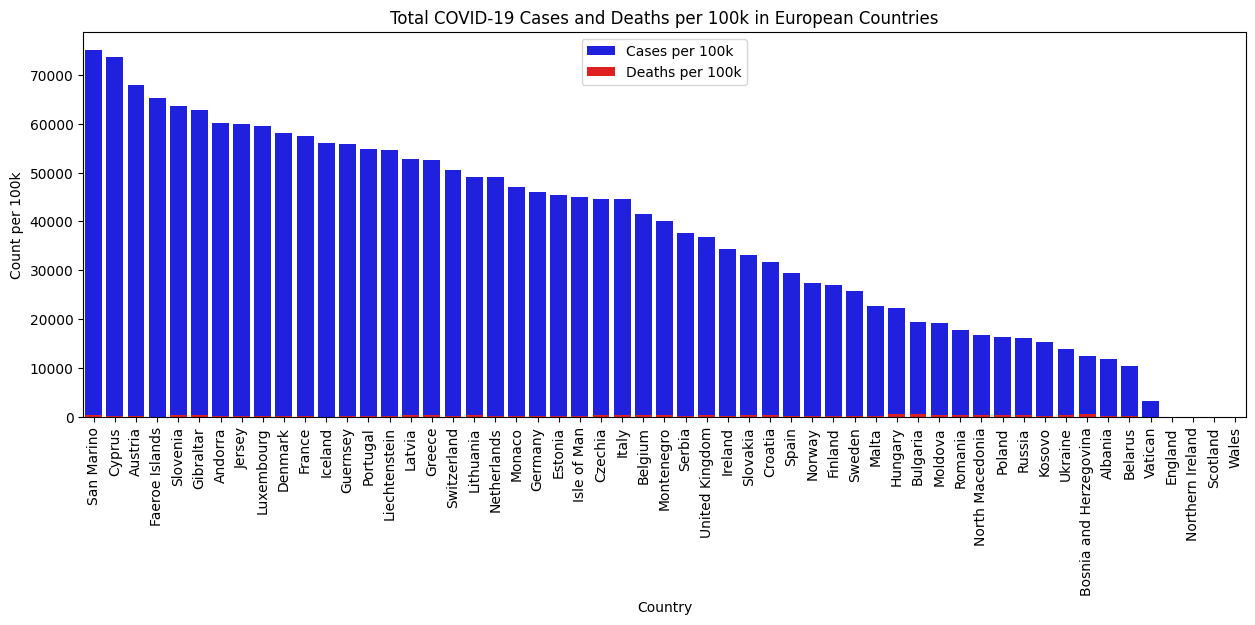

In [27]:
# Selecting relevant metrics for comparison
europe_metrics = europe_data.groupby('location').agg(
    total_cases=('total_cases', 'max'),
    total_deaths=('total_deaths', 'max'),
    population=('population', 'mean')
).reset_index()

# Calculating additional metrics
europe_metrics['case_fatality_rate'] = europe_metrics['total_deaths'] / europe_metrics['total_cases']
europe_metrics['cases_per_100k'] = (europe_metrics['total_cases'] / europe_metrics['population']) * 100000
europe_metrics['deaths_per_100k'] = (europe_metrics['total_deaths'] / europe_metrics['population']) * 100000

# Since the latest vaccination data might be more relevant, filter for the most recent data for each country
latest_dates = europe_data.groupby('location')['date'].max()
latest_vaccination_data = europe_data[europe_data.set_index(['location', 'date']).index.isin(latest_dates.items())]

# Merging the latest vaccination data
europe_metrics = europe_metrics.merge(
    latest_vaccination_data[['location', 'people_vaccinated_per_hundred']], on='location', how='left')

# Plotting
# Bar Chart of Total Cases and Deaths per 100k
plt.figure(figsize=(15, 5))
europe_metrics_sorted = europe_metrics.sort_values(by='cases_per_100k', ascending=False)
sns.barplot(x='location', y='cases_per_100k', data=europe_metrics_sorted, color='blue', label='Cases per 100k')
sns.barplot(x='location', y='deaths_per_100k', data=europe_metrics_sorted, color='red', label='Deaths per 100k')
plt.xticks(rotation=90)
plt.legend()
plt.title('Total COVID-19 Cases and Deaths per 100k in European Countries')
plt.xlabel('Country')
plt.ylabel('Count per 100k')
plt.show()

# Visualisation Spead Of Covid-19 Over Time by Country in a map
<span style="color:red">Explain the map and the plot. If possible than speed up the play button</span>

In [28]:
# Convert 'date' to datetime and filter out any rows with nan values in 'iso_code' or 'total_cases'
covid_data = covid_data_df.dropna(subset=['iso_code', 'total_cases'])
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Ensure there are no nan dates
covid_data = covid_data[~covid_data['date'].isna()]

# Create the animated map
fig = px.scatter_geo(covid_data,
                     locations='iso_code',  # Using ISO codes for countries
                     color='total_cases',  # Representing the total number of cases
                     hover_name='location',  # Showing country name on hover
                     size='total_cases',  # The size of the dots represents the number of cases
                     animation_frame=covid_data['date'].dt.strftime('%Y-%m-%d'),  # Converting dates to string format for animation frames
                     projection='natural earth',  # Map projection style
                     title='Spread of COVID-19 Over Time by Country')

fig.update_layout(autosize=True)
fig.show()

/var/folders/vd/bb2y2m3x70q9tythmbcl1kkc0000gn/T/ipykernel_17298/3274620699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data['date'] = pd.to_datetime(covid_data['date'])


NameError: name 'px' is not defined

## Simple Linear Regression betwennt the bitcoin-price  and COVID-19 cases
<span style="color:red">Explain why we try to find a simple linear regression between the bitcoin and covid-19 cases</span>
</br></br>
<span style="color:red; font-weight: 600">Häusler: Why do we do the regression? -> What question would we anser?</span>

In [29]:
#Read in the dataset and plot 5 random rows
btc_data_df = pd.read_excel('Data/BTCinUSD.xlsx')
btc_data_df.sample(n=5)

,Date,Price,Open,High,Low,Vol.,Change %
1318,05/23/2020,"8,422.1","8,413.7","8,538.5","8,355.1",2.18K,+0.10%
358,2023-08-01 00:00:00,"16,051.3","15,912.7","16,079.1","15,873.4",0.38K,+0.87%
745,12/17/2021,"41,089.8","42,045.6","42,415.7","40,259.8",1.98K,-2.27%
82,2023-11-10 00:00:00,"25,303.5","25,833.8","25,897.5","25,075.3",1.17K,-2.05%
719,2022-12-01 00:00:00,"38,438.9","37,626.4","38,724.3","37,400.9",1.76K,+2.16%


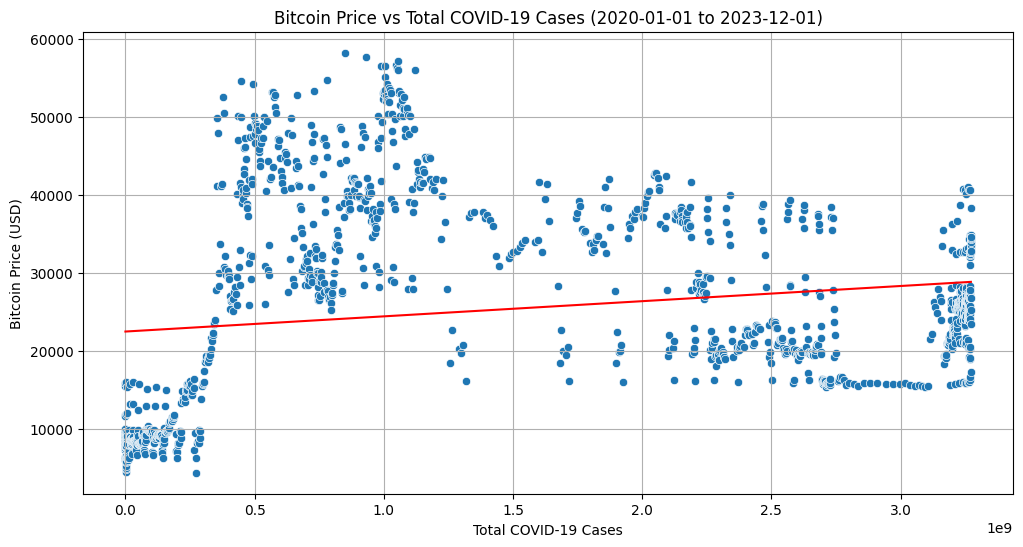

Slope: 1.947707185615205e-06
Intercept: 22505.011562600404
Correlation coefficient (r-value): 0.1900815535185454
P-value: 4.1545969845444565e-13
Standard error: 2.6611943110080635e-07


In [30]:
#Bring this inputs to the top of the notebook, if the plot is used in the final version
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import operator 


# Load and preprocess the COVID-19 data
covid_data_path = 'Data/owid-covid-data.csv'
covid_df = pd.read_csv(covid_data_path)
covid_df['date'] = pd.to_datetime(covid_df['date'])
global_covid_df = covid_df.groupby('date')['total_cases'].sum().reset_index()

# Load and preprocess the Bitcoin data
bitcoin_data_path = 'Data/BTCinUSD.xlsx'
bitcoin_df = pd.read_excel(bitcoin_data_path)
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'], errors='coerce')
bitcoin_df['Price'] = bitcoin_df['Price'].str.replace(',', '').astype(float)

# Merge the datasets on the date
merged_df = pd.merge(global_covid_df, bitcoin_df, left_on='date', right_on='Date', how='inner')

# Filter the data from 2020-01-01 to 2023-12-01
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 12, 1)
filtered_df = merged_df[(merged_df['date'] >= start_date) & (merged_df['date'] <= end_date)]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['total_cases'], filtered_df['Price'])

# Plotting
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_cases', y='Price', data=filtered_df)
plt.plot(filtered_df['total_cases'], intercept + slope * filtered_df['total_cases'], color='red')
plt.title('Bitcoin Price vs Total COVID-19 Cases (2020-01-01 to 2023-12-01)')
plt.xlabel('Total COVID-19 Cases')
plt.ylabel('Bitcoin Price (USD)')
plt.grid(True)
plt.show()

# Output the regression statistics
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Correlation coefficient (r-value): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

## Polynomial Regression BTC_Price / COVID-19
<span style="color:red">Why a polynomial regression? Do we need it? Do wee need the linear regression above if we plot it here again?</span>

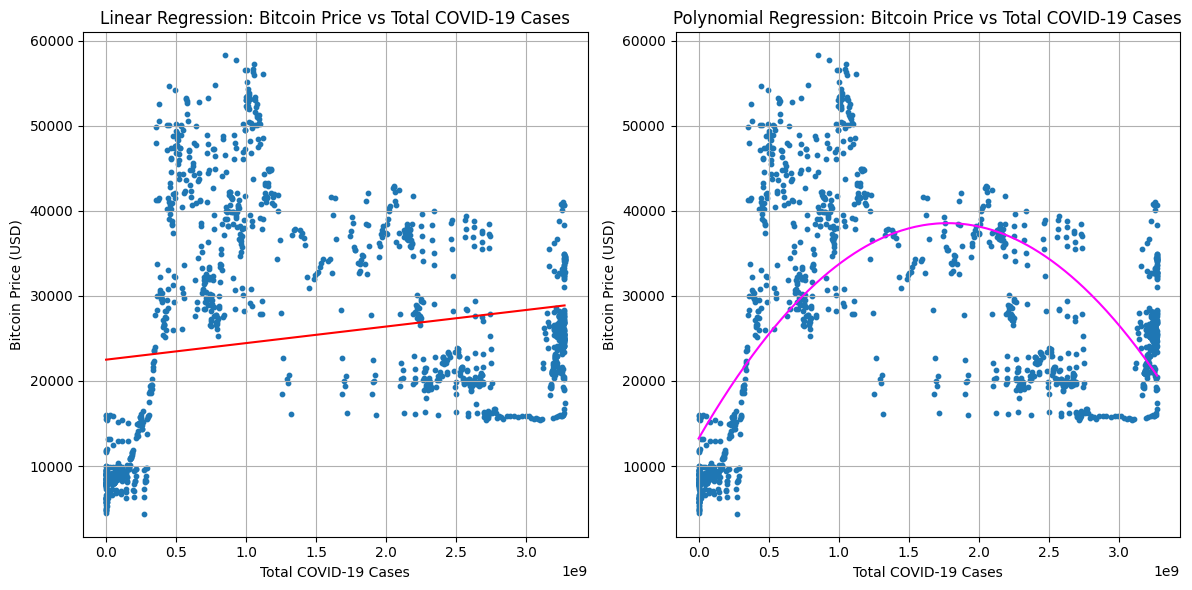

Linear Regression Metrics:
  Root Mean Squared Error: 12623.8742697234
  Coefficient of Determination (R^2): 0.03613099698802369

Polynomial Regression Metrics:
  Root Mean Squared Error: 9999.008179142656
  Coefficient of Determination (R^2): 0.3952908494759454


In [31]:
# Linear Regression
X_linear = filtered_df['total_cases'].values.reshape(-1, 1)
y_linear = filtered_df['Price'].values
model_linear = LinearRegression()
model_linear.fit(X_linear, y_linear)
y_linear_pred = model_linear.predict(X_linear)

# Evaluation Metrics for Linear Regression
rmse_linear = np.sqrt(mean_squared_error(y_linear, y_linear_pred))
r2_linear = r2_score(y_linear, y_linear_pred)

# Polynomial Regression
degree = 2
polynomial_features = PolynomialFeatures(degree=degree)
X_poly = polynomial_features.fit_transform(X_linear)
model_poly = LinearRegression()
model_poly.fit(X_poly, y_linear)
y_poly_pred = model_poly.predict(X_poly)

# Evaluation Metrics for Polynomial Regression
rmse_poly = np.sqrt(mean_squared_error(y_linear, y_poly_pred))
r2_poly = r2_score(y_linear, y_poly_pred)

# Plotting Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_linear, y_linear, s=10)
plt.plot(X_linear, y_linear_pred, color='red')
plt.title('Linear Regression: Bitcoin Price vs Total COVID-19 Cases')
plt.xlabel('Total COVID-19 Cases')
plt.ylabel('Bitcoin Price (USD)')
plt.grid(True)

# Plotting Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(X_linear, y_linear, s=10)
sorted_zip = sorted(zip(X_linear, y_poly_pred), key=operator.itemgetter(0))
X_sorted, y_poly_sorted = zip(*sorted_zip)
plt.plot(X_sorted, y_poly_sorted, color='magenta')
plt.title('Polynomial Regression: Bitcoin Price vs Total COVID-19 Cases')
plt.xlabel('Total COVID-19 Cases')
plt.ylabel('Bitcoin Price (USD)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Output the evaluation metrics
print("Linear Regression Metrics:")
print(f"  Root Mean Squared Error: {rmse_linear}")
print(f"  Coefficient of Determination (R^2): {r2_linear}\n")

print("Polynomial Regression Metrics:")
print(f"  Root Mean Squared Error: {rmse_poly}")
print(f"  Coefficient of Determination (R^2): {r2_poly}")

## Financial Indicies
Dow Jones: https://www.investing.com/indices/us-30-historical-data (last accessed: 10.01.2024)
</br></br>
<span style="color:red">Why financial indicies? What is to be expected? What will be searched for in the following code?</span>
</br></br>
<span style="color:red">@Max: 
 * Bring the code, comments and outputs in english
 * Delete or handle the warnings
 * Adjust the output to a interpretable plot

</span>

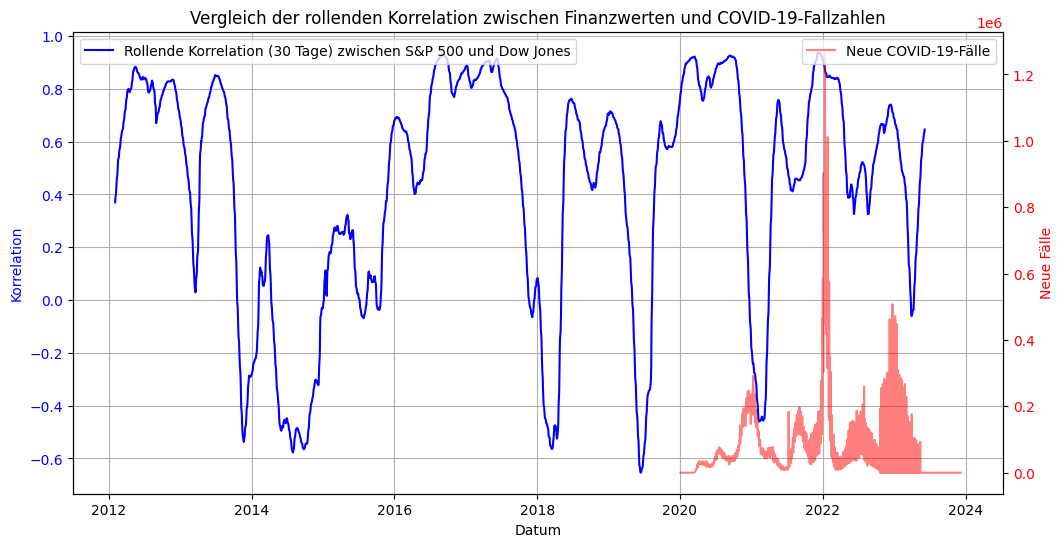

Durchschnittliche Pearson-Korrelation vor dem 1. März 2020: 0.3748113258639
Durchschnittliche Pearson-Korrelation ab dem 1. März 2020: 0.5534695194254328
Durchschnittliche Kendall-Korrelation vor dem 1. März 2020: 0.3748113258639
Durchschnittliche Kendall-Korrelation ab dem 1. März 2020: 0.5534695194254328
Durchschnittliche Spearman-Korrelation vor dem 1. März 2020: 0.3748113258639
Durchschnittliche Spearman-Korrelation ab dem 1. März 2020: 0.5534695194254328


In [35]:
# Pfade zu den Datensätzen
covid_data_path = './Data/owid-covid-data.csv'  # COVID-19-Datenpfad
finance_data_path1 = './Data/S&P 500 Historical Data.csv'  # Erster Finanzdatenpfad
finance_data_path2 = './Data/BTC_USD Bitfinex Historical Data.csv'  # Zweiter Finanzdatenpfad

# Lese den COVID-19-Datensatz
covid_df = pd.read_csv(covid_data_path)
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df = covid_df[covid_df['location'] == 'United States']
covid_df = covid_df.groupby('date')['new_cases'].sum().reset_index()

# Lese die Finanzdatensätze
finance_df1 = pd.read_csv(finance_data_path1)
finance_df1['Date'] = pd.to_datetime(finance_df1['Date'])
finance_df1['Price1'] = pd.to_numeric(finance_df1['Price'].str.replace(',', ''), errors='coerce')

finance_df2 = pd.read_csv(finance_data_path2)
finance_df2['Date'] = pd.to_datetime(finance_df2['Date'])
finance_df2['Price2'] = pd.to_numeric(finance_df2['Price'].str.replace(',', ''), errors='coerce')

# Merge der Finanzdatensätze basierend auf dem Datum
merged_finance_df = pd.merge(finance_df1, finance_df2, on='Date', how='inner')

# Berechnen der rollenden Korrelation
window_size = 150  # Rollendes Fenster für die Korrelation
rolling_correlation = merged_finance_df['Price1'].rolling(window=window_size).corr(merged_finance_df['Price2'])

# Erstellen des Plots für die Finanzdatenkorrelation
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_finance_df['Date'], rolling_correlation, label='Rollende Korrelation (30 Tage) zwischen S&P 500 und Dow Jones', color='blue')
ax1.set_xlabel('Datum')
ax1.set_ylabel('Korrelation', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.grid(True)

# Hinzufügen des COVID-19-Charts
ax2 = ax1.twinx()  # Zweite Achse für COVID-19-Daten
ax2.plot(covid_df['date'], covid_df['new_cases'], label='Neue COVID-19-Fälle', color='red', alpha=0.5)
ax2.set_ylabel('Neue Fälle', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Vergleich der rollenden Korrelation zwischen Finanzwerten und COVID-19-Fallzahlen')
plt.show()


### Korrelation with three different Methods
merged_finance_df['Date'] = pd.to_datetime(merged_finance_df['Date'])

# Fügen Sie das Jahr hinzu
merged_finance_df['Year'] = merged_finance_df['Date'].dt.year

# Berechnen der rollenden Korrelation
cutoff_date = pd.to_datetime("2020-03-01")
merged_finance_df['Price1'] = pd.to_numeric(merged_finance_df['Price1'], errors='coerce')
merged_finance_df['Price2'] = pd.to_numeric(merged_finance_df['Price2'], errors='coerce')

# Berechnen der rollenden Korrelationen für jede Methode
rolling_corr_pearson = merged_finance_df['Price1'].rolling(window=window_size).corr(merged_finance_df['Price2'], method='pearson')
rolling_corr_kendall = merged_finance_df['Price1'].rolling(window=window_size).corr(merged_finance_df['Price2'], method='kendall')
rolling_corr_spearman = merged_finance_df['Price1'].rolling(window=window_size).corr(merged_finance_df['Price2'], method='spearman')

# Fügen Sie die rollenden Korrelationen dem DataFrame hinzu
merged_finance_df['Rolling Correlation Pearson'] = rolling_corr_pearson
merged_finance_df['Rolling Correlation Kendall'] = rolling_corr_kendall
merged_finance_df['Rolling Correlation Spearman'] = rolling_corr_spearman

# Filtern nach dem Trenndatum
pre_cutoff = merged_finance_df[merged_finance_df['Date'] < cutoff_date]
post_cutoff = merged_finance_df[merged_finance_df['Date'] >= cutoff_date]

# Durchschnittliche Korrelationen für jeden Zeitraum und jede Methode berechnen
avg_corr_pre_cutoff_pearson = pre_cutoff['Rolling Correlation Pearson'].mean()
avg_corr_post_cutoff_pearson = post_cutoff['Rolling Correlation Pearson'].mean()

avg_corr_pre_cutoff_kendall = pre_cutoff['Rolling Correlation Kendall'].mean()
avg_corr_post_cutoff_kendall = post_cutoff['Rolling Correlation Kendall'].mean()

avg_corr_pre_cutoff_spearman = pre_cutoff['Rolling Correlation Spearman'].mean()
avg_corr_post_cutoff_spearman = post_cutoff['Rolling Correlation Spearman'].mean()

# Ausgabe der Ergebnisse
print("Durchschnittliche Pearson-Korrelation vor dem 1. März 2020:", avg_corr_pre_cutoff_pearson)
print("Durchschnittliche Pearson-Korrelation ab dem 1. März 2020:", avg_corr_post_cutoff_pearson)
print("Durchschnittliche Kendall-Korrelation vor dem 1. März 2020:", avg_corr_pre_cutoff_kendall)
print("Durchschnittliche Kendall-Korrelation ab dem 1. März 2020:", avg_corr_post_cutoff_kendall)
print("Durchschnittliche Spearman-Korrelation vor dem 1. März 2020:", avg_corr_pre_cutoff_spearman)
print("Durchschnittliche Spearman-Korrelation ab dem 1. März 2020:", avg_corr_post_cutoff_spearman)
